In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
## braz_covid19 contains data of the brazil coronavirus .
braz_covid19=pd.read_csv('C:\\Users\\AVIRAJ\\Desktop\\brazil_covid19.csv')
braz_covid19.head()

,date,region,state,cases,deaths
0,2020-02-25,Centro-Oeste,DF,0,0
1,2020-02-25,Centro-Oeste,GO,0,0
2,2020-02-25,Centro-Oeste,MS,0,0
3,2020-02-25,Centro-Oeste,MT,0,0
4,2020-02-25,Nordeste,AL,0,0


In [18]:
braz_covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3105 entries, 0 to 3104
Data columns (total 5 columns):
date      3105 non-null object
region    3105 non-null object
state     3105 non-null object
cases     3105 non-null int64
deaths    3105 non-null int64
dtypes: int64(2), object(3)
memory usage: 121.4+ KB


## Total Covid19 cases regionwise in Brazil

In [13]:
regionwise=braz_covid19.groupby(by='region')
regionwise.sum()

,cases,deaths
region,,
Centro-Oeste,899108,18337
Nordeste,7725004,386781
Norte,4429907,230176
Sudeste,8504850,614851
Sul,1050311,27465


In [19]:
braz_covid19['region'].value_counts()

Nordeste        1035
Norte            805
Sudeste          460
Centro-Oeste     460
Sul              345
Name: region, dtype: int64

In [24]:
regionwise[regionwise['date']=='2020-06-18']

KeyError: 'Column not found: False'

In [26]:
latest_case=braz_covid19[braz_covid19['date']=='2020-06-18']

## According to latest date in dataset,i.e. 2020-6-18,what is situation in Brazil

In [30]:
k=latest_case.groupby(by=['region','state'])
k.sum()

cases  deaths
region       state                
Centro-Oeste DF      28521     379
             GO      13304     264
             MS       4274      39
             MT       7512     281
Nordeste     AL      25633     831
             BA      41577    1263
             CE      87273    5377
             MA      66091    1607
             PB      31760     709
             PE      48626    4057
             PI      12099     421
             RN      15889     655
             SE      17338     400
Norte        AC      10664     287
             AM      60736    2605
             AP      19387     342
             PA      76623    4395
             RO      13804     374
             RR       7421     231
             TO       7774     152
Sudeste      ES      31671    1217
             MG      24906     570
             RJ      87317    8412
             SP     192628   11846
Sul          PR      11919     406
             RS      17822     406
             SC      15573     222

## According to data,regions of Nordeste & Sudeste are more epicenters of Coronavirus in Brazil  followed by Norte.Going by deaths,Sudeste has the highest deaths followed by Nordeste.

## Inference- 1)Centro-Oeste is better equiped to better medical facilities as low deaths,even here cases are lesser compared to brazil regions

In [31]:
k=latest_case.groupby(by=['region'])
k.sum()

,cases,deaths
region,,
Centro-Oeste,53611,963
Nordeste,346286,15320
Norte,196409,8386
Sudeste,336522,22045
Sul,45314,1034


In [44]:
v=latest_case.groupby(by='state')
g=v.sum()
g.sort_values(by='cases',ascending=False)

,cases,deaths
state,,
SP,192628,11846
RJ,87317,8412
CE,87273,5377
PA,76623,4395
MA,66091,1607
AM,60736,2605
PE,48626,4057
BA,41577,1263
PB,31760,709


## Inference- We see that most cases in Brazil is in Sao Paulo & Rio De Janeiro cities.This is due to the increased populations in these areas & moreover the economic & tourist activities taking part in the city.

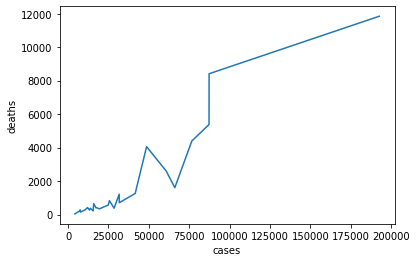

In [45]:
sns.lineplot(x=g['cases'],y=g['deaths'],data=g)
plt.show()

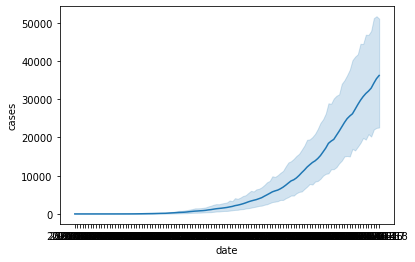

In [57]:
sns.lineplot(x=braz_covid19['date'],y=braz_covid19['cases'],data=braz_covid19)
#f,ax=plt.subplots(figsize=(16,12))
plt.show()


## We see that Brazil has reached the peak of its covid-19 cases as on 2020-6-18.Its registering over 50000 cases daily which is huge!!!

In [3]:
brazil_city=pd.read_csv('C:\\Users\\AVIRAJ\\Desktop\\brazil_covid19_cities.csv')
brazil_city.head()

,date,state,name,code,cases,deaths
0,2020-03-27,AC,Acrelândia,120001.0,0,0
1,2020-03-27,AC,Assis Brasil,120005.0,0,0
2,2020-03-27,AC,Brasiléia,120010.0,0,0
3,2020-03-27,AC,Bujari,120013.0,0,0
4,2020-03-27,AC,Capixaba,120017.0,0,0


In [4]:
brazil_city['name'].value_counts()

Bom Jesus              420
Santa Helena           336
Vera Cruz              336
Santa Inês             336
Santa Luzia            336
                      ... 
Carnaúba dos Dantas     84
Leme                    84
Salto da Divisa         84
Caxias                  84
Dom Eliseu              84
Name: name, Length: 4624, dtype: int64

In [18]:
m=brazil_city.groupby(by=['name'])
n=m.sum()
c=n.sort_values(by='cases',ascending=False)
Braz_city_casewise=c.drop(['code','deaths'],axis=1)

In [21]:
Braz_city_casewise

,cases
name,
São Paulo,2819857
Rio de Janeiro,1249043
Fortaleza,1054824
Manaus,748477
Recife,644861
...,...
Bom Jesus do Oeste,0
Chapadão do Lageado,0
Loreto,0


## Sau Paulo is the worst affected city in Brazil wrt covid-19.

,region\tstate\tcity\tstate_code\tcity_code\thealth_region_code\thealth_region\tpopulation
0,Centro-Oeste\tMato Grosso do Sul\tAlcinópolis\...
1,Centro-Oeste\tMato Grosso do Sul\tAmambai\t50\...
2,Centro-Oeste\tMato Grosso do Sul\tBataguassu\t...
3,Centro-Oeste\tMato Grosso do Sul\tBatayporã\t5...
4,Centro-Oeste\tMato Grosso do Sul\tBela Vista\t...
